In [1]:
# ============================================================================
# PARTIE 1: IMPORTATION DES BIBLIOTHÈQUES
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

print("TensorFlow version:", tf.__version__)
print("Bibliothèques importées avec succès!")

TensorFlow version: 2.19.0
Bibliothèques importées avec succès!


In [2]:
print("\n" + "="*70)
print("PARTIE 2: GÉNÉRATION SYNTHÉTIQUE DE DONNÉES")
print("="*70)


PARTIE 2: GÉNÉRATION SYNTHÉTIQUE DE DONNÉES


In [3]:
# Paramètres
np.random.seed(42)
n_samples = 500

# Génération aléatoire de deux classes avec séparation +/-2
X_class_0 = np.random.randn(n_samples // 2, 2) + np.array([-2, -2])
X_class_1 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])

# Combinaison des données
X_separated = np.vstack([X_class_0, X_class_1])
y_separated = np.hstack([np.zeros(n_samples // 2), np.ones(n_samples // 2)])

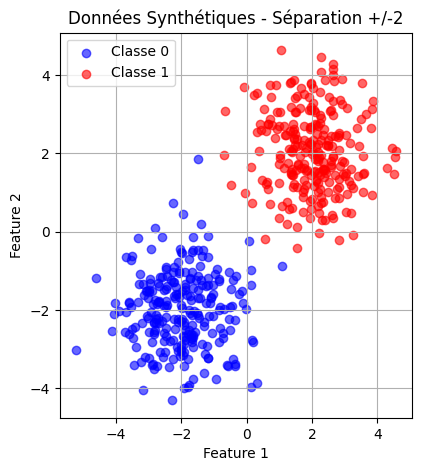

In [4]:
# Visualisation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_class_0[:, 0], X_class_0[:, 1], c='blue', label='Classe 0', alpha=0.6)
plt.scatter(X_class_1[:, 0], X_class_1[:, 1], c='red', label='Classe 1', alpha=0.6)
plt.title('Données Synthétiques - Séparation +/-2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

In [5]:
# Division train/test
X_train_sep, X_test_sep, y_train_sep, y_test_sep = train_test_split(
    X_separated, y_separated, test_size=0.2, random_state=42
)


In [6]:
# Régression Logistique
log_reg = LogisticRegression()
log_reg.fit(X_train_sep, y_train_sep)
y_pred_log = log_reg.predict(X_test_sep)
acc_log_sep = accuracy_score(y_test_sep, y_pred_log)

print(f"\n📊 Régression Logistique (séparation +/-2):")
print(f"   Accuracy: {acc_log_sep:.4f}")


📊 Régression Logistique (séparation +/-2):
   Accuracy: 0.9900


In [7]:
# Régression Linéaire (pour comparaison)
lin_reg = LinearRegression()
lin_reg.fit(X_train_sep, y_train_sep)
y_pred_lin_raw = lin_reg.predict(X_test_sep)
y_pred_lin = (y_pred_lin_raw > 0.5).astype(int)
acc_lin_sep = accuracy_score(y_test_sep, y_pred_lin)

print(f"\n📊 Régression Linéaire (séparation +/-2):")
print(f"   Accuracy: {acc_lin_sep:.4f}")



📊 Régression Linéaire (séparation +/-2):
   Accuracy: 0.9900


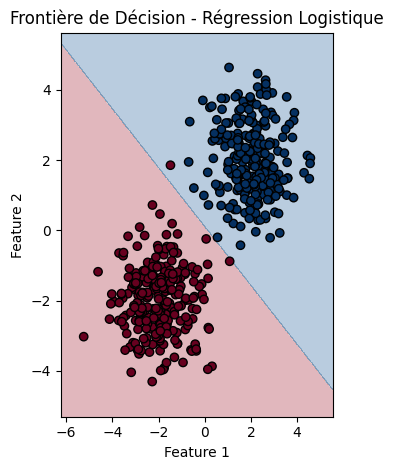

In [8]:
# Visualisation des frontières de décision
plt.subplot(1, 2, 2)
h = .02
x_min, x_max = X_separated[:, 0].min() - 1, X_separated[:, 0].max() + 1
y_min, y_max = X_separated[:, 1].min() - 1, X_separated[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
plt.scatter(X_separated[:, 0], X_separated[:, 1], c=y_separated, cmap='RdBu', edgecolors='k')
plt.title('Frontière de Décision - Régression Logistique')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

In [9]:
print("\n" + "="*70)
print("PARTIE 4: DONNÉES AVEC ÉCART MINIMAL (+/-0.0001)")
print("="*70)


PARTIE 4: DONNÉES AVEC ÉCART MINIMAL (+/-0.0001)


In [10]:
# Génération de données avec écart minimal
X_class_0_close = np.random.randn(n_samples // 2, 2) + np.array([-0.0001, -0.0001])
X_class_1_close = np.random.randn(n_samples // 2, 2) + np.array([0.0001, 0.0001])

X_close = np.vstack([X_class_0_close, X_class_1_close])
y_close = np.hstack([np.zeros(n_samples // 2), np.ones(n_samples // 2)])

# Division train/test
X_train_close, X_test_close, y_train_close, y_test_close = train_test_split(
    X_close, y_close, test_size=0.2, random_state=42
)

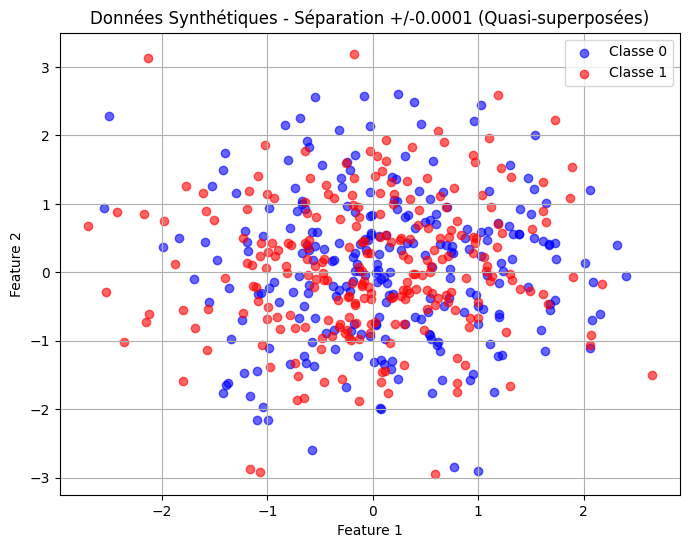

In [11]:
# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(X_class_0_close[:, 0], X_class_0_close[:, 1], c='blue', label='Classe 0', alpha=0.6)
plt.scatter(X_class_1_close[:, 0], X_class_1_close[:, 1], c='red', label='Classe 1', alpha=0.6)
plt.title('Données Synthétiques - Séparation +/-0.0001 (Quasi-superposées)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [12]:

# --- Modèle avec ReLU ---
print("\n🔷 Modèle avec fonction d'activation ReLU:")

model_relu = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_relu.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_relu = model_relu.fit(
    X_train_close, y_train_close,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

loss_relu, acc_relu = model_relu.evaluate(X_test_close, y_test_close, verbose=0)
print(f"   Accuracy avec ReLU: {acc_relu:.4f}")



🔷 Modèle avec fonction d'activation ReLU:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   Accuracy avec ReLU: 0.5100


In [14]:
# --- Modèle avec Sigmoid ---
print("\n🔶 Modèle avec fonction d'activation Sigmoid:")

model_sigmoid = keras.Sequential([
    layers.Dense(16, activation='sigmoid', input_shape=(2,)),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_sigmoid.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_sigmoid = model_sigmoid.fit(
    X_train_close, y_train_close,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

loss_sigmoid, acc_sigmoid = model_sigmoid.evaluate(X_test_close, y_test_close, verbose=0)
print(f"   Accuracy avec Sigmoid: {acc_sigmoid:.4f}")



🔶 Modèle avec fonction d'activation Sigmoid:
   Accuracy avec Sigmoid: 0.5200


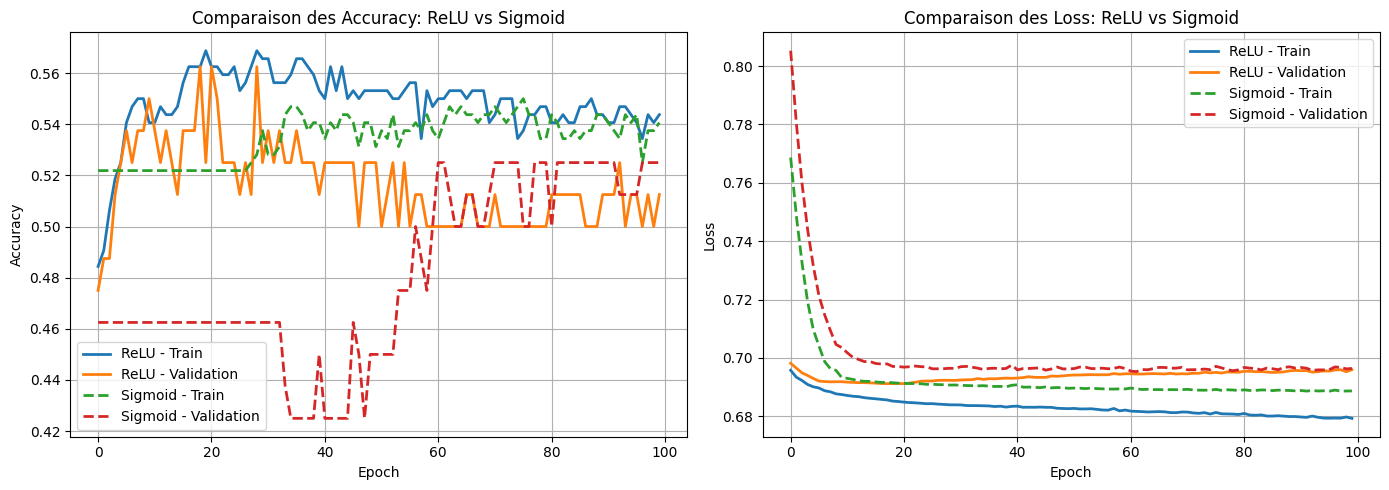

In [15]:
# Comparaison des courbes d'apprentissage
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_relu.history['accuracy'], label='ReLU - Train', linewidth=2)
plt.plot(history_relu.history['val_accuracy'], label='ReLU - Validation', linewidth=2)
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid - Train', linewidth=2, linestyle='--')
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid - Validation', linewidth=2, linestyle='--')
plt.title('Comparaison des Accuracy: ReLU vs Sigmoid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_relu.history['loss'], label='ReLU - Train', linewidth=2)
plt.plot(history_relu.history['val_loss'], label='ReLU - Validation', linewidth=2)
plt.plot(history_sigmoid.history['loss'], label='Sigmoid - Train', linewidth=2, linestyle='--')
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid - Validation', linewidth=2, linestyle='--')
plt.title('Comparaison des Loss: ReLU vs Sigmoid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
print("\n" + "="*70)
print("PARTIE 5: DATASET MAKE_MOONS")
print("="*70)


PARTIE 5: DATASET MAKE_MOONS


In [26]:
# Importation et génération du dataset make_moons
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Vérification des shapes
print(f"\n📐 Dimensions des données Make_Moons:")
print(f"   X.shape: {X.shape}")
print(f"   y.shape: {y.shape}")

# Renommer pour cohérence avec le reste du code
X_moons, y_moons = X, y

# Division train/test
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.2, random_state=42
)


📐 Dimensions des données Make_Moons:
   X.shape: (200, 2)
   y.shape: (200,)


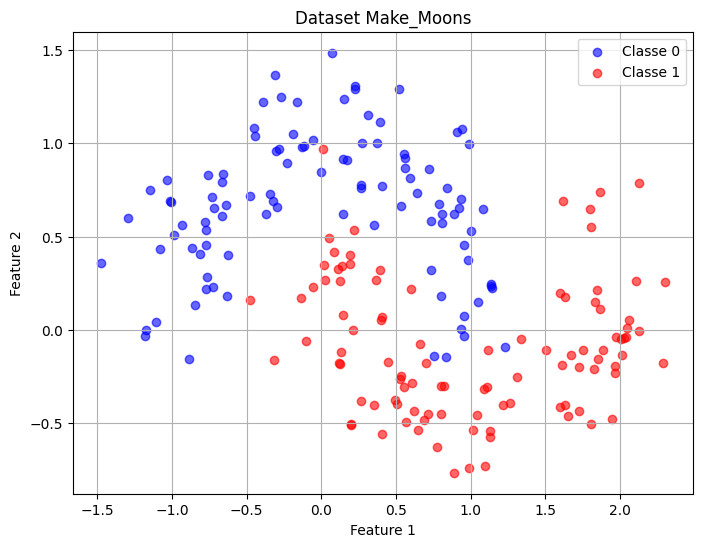

In [27]:
# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], c='blue', label='Classe 0', alpha=0.6)
plt.scatter(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], c='red', label='Classe 1', alpha=0.6)
plt.title('Dataset Make_Moons')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# --- Test avec ReLU sur make_moons ---
print("\n🔷 Make_Moons avec ReLU:")

model_moons_relu = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_moons_relu.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_moons_relu = model_moons_relu.fit(
    X_train_moons, y_train_moons,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

loss_moons_relu, acc_moons_relu = model_moons_relu.evaluate(X_test_moons, y_test_moons, verbose=0)
print(f"   Accuracy avec ReLU: {acc_moons_relu:.4f}")


🔷 Make_Moons avec ReLU:
   Accuracy avec ReLU: 0.8000


In [29]:
# --- Test avec Sigmoid sur make_moons ---
print("\n🔶 Make_Moons avec Sigmoid:")

model_moons_sigmoid = keras.Sequential([
    layers.Dense(16, activation='sigmoid', input_shape=(2,)),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_moons_sigmoid.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_moons_sigmoid = model_moons_sigmoid.fit(
    X_train_moons, y_train_moons,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

loss_moons_sigmoid, acc_moons_sigmoid = model_moons_sigmoid.evaluate(X_test_moons, y_test_moons, verbose=0)
print(f"   Accuracy avec Sigmoid: {acc_moons_sigmoid:.4f}")


🔶 Make_Moons avec Sigmoid:
   Accuracy avec Sigmoid: 0.8250


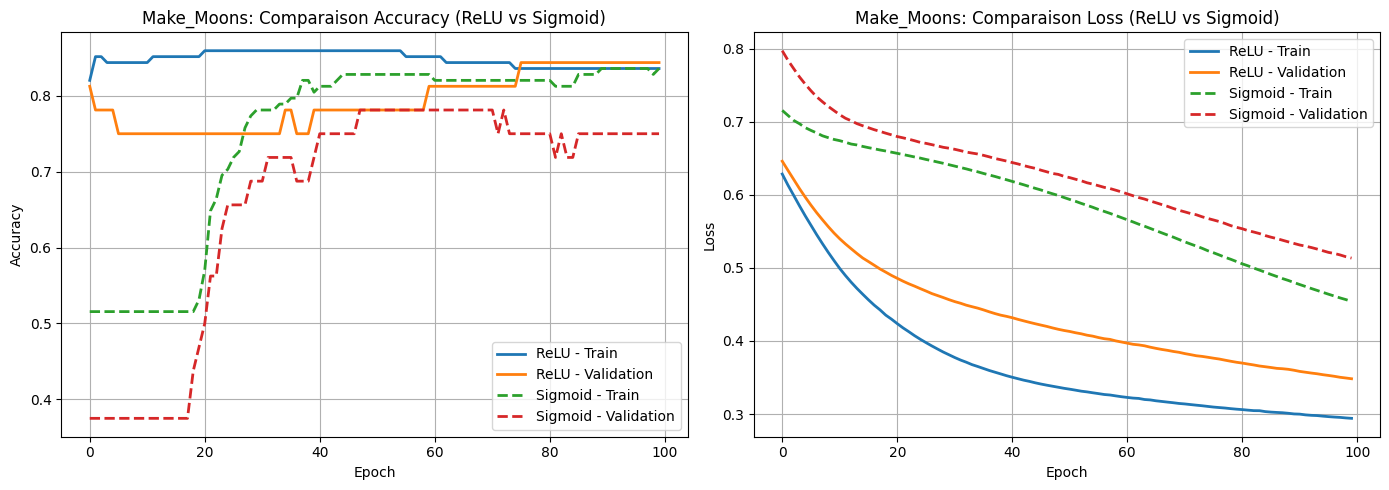

In [30]:
# Comparaison visuelle
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_moons_relu.history['accuracy'], label='ReLU - Train', linewidth=2)
plt.plot(history_moons_relu.history['val_accuracy'], label='ReLU - Validation', linewidth=2)
plt.plot(history_moons_sigmoid.history['accuracy'], label='Sigmoid - Train', linewidth=2, linestyle='--')
plt.plot(history_moons_sigmoid.history['val_accuracy'], label='Sigmoid - Validation', linewidth=2, linestyle='--')
plt.title('Make_Moons: Comparaison Accuracy (ReLU vs Sigmoid)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_moons_relu.history['loss'], label='ReLU - Train', linewidth=2)
plt.plot(history_moons_relu.history['val_loss'], label='ReLU - Validation', linewidth=2)
plt.plot(history_moons_sigmoid.history['loss'], label='Sigmoid - Train', linewidth=2, linestyle='--')
plt.plot(history_moons_sigmoid.history['val_loss'], label='Sigmoid - Validation', linewidth=2, linestyle='--')
plt.title('Make_Moons: Comparaison Loss (ReLU vs Sigmoid)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
print("\n" + "="*70)
print("PARTIE 6: RÉGRESSION LOGISTIQUE AVEC TENSORFLOW")
print("="*70)



PARTIE 6: RÉGRESSION LOGISTIQUE AVEC TENSORFLOW


In [32]:
# Régression logistique pure (1 neurone, pas de couche cachée)
model_log_reg_tf = keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(2,))
])

model_log_reg_tf.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\n🔹 Régression Logistique TensorFlow sur données séparées (+/-2):")
history_log_sep = model_log_reg_tf.fit(
    X_train_sep, y_train_sep,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

loss_log_sep, acc_log_sep_tf = model_log_reg_tf.evaluate(X_test_sep, y_test_sep, verbose=0)
print(f"   Accuracy: {acc_log_sep_tf:.4f}")

print("\n🔹 Régression Logistique TensorFlow sur make_moons:")
model_log_reg_moons = keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(2,))
])

model_log_reg_moons.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_log_moons = model_log_reg_moons.fit(
    X_train_moons, y_train_moons,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

loss_log_moons, acc_log_moons_tf = model_log_reg_moons.evaluate(X_test_moons, y_test_moons, verbose=0)
print(f"   Accuracy: {acc_log_moons_tf:.4f}")


🔹 Régression Logistique TensorFlow sur données séparées (+/-2):
   Accuracy: 0.0100

🔹 Régression Logistique TensorFlow sur make_moons:
   Accuracy: 0.7000


In [33]:
print("\n" + "="*70)
print("PARTIE 7: RÉSEAU DE NEURONES COMPLET")
print("="*70)


PARTIE 7: RÉSEAU DE NEURONES COMPLET


In [34]:
print("\n📚 TERMINOLOGIE DES RÉSEAUX DE NEURONES:")
print("   • Neurone: Unité de base qui calcule une somme pondérée + activation")
print("   • Couche d'entrée (Input Layer): Reçoit les features (2 dans notre cas)")
print("   • Couches cachées (Hidden Layers): Transforment les données")
print("   • Couche de sortie (Output Layer): Produit la prédiction finale")
print("   • Poids (Weights): Paramètres appris pendant l'entraînement")
print("   • Biais (Bias): Terme constant ajouté à chaque neurone")
print("   • Fonction d'activation: Introduit de la non-linéarité (ReLU, Sigmoid, etc.)")
print("   • Forward propagation: Calcul de la prédiction de l'entrée vers la sortie")
print("   • Backpropagation: Calcul des gradients pour ajuster les poids")
print("   • Epoch: Une passe complète sur toutes les données d'entraînement")
print("   • Batch: Sous-ensemble de données traité en une fois")
print("   • Loss: Mesure de l'erreur entre prédiction et réalité")
print("   • Optimizer: Algorithme pour ajuster les poids (Adam, SGD, etc.)")


📚 TERMINOLOGIE DES RÉSEAUX DE NEURONES:
   • Neurone: Unité de base qui calcule une somme pondérée + activation
   • Couche d'entrée (Input Layer): Reçoit les features (2 dans notre cas)
   • Couches cachées (Hidden Layers): Transforment les données
   • Couche de sortie (Output Layer): Produit la prédiction finale
   • Poids (Weights): Paramètres appris pendant l'entraînement
   • Biais (Bias): Terme constant ajouté à chaque neurone
   • Fonction d'activation: Introduit de la non-linéarité (ReLU, Sigmoid, etc.)
   • Forward propagation: Calcul de la prédiction de l'entrée vers la sortie
   • Backpropagation: Calcul des gradients pour ajuster les poids
   • Epoch: Une passe complète sur toutes les données d'entraînement
   • Batch: Sous-ensemble de données traité en une fois
   • Loss: Mesure de l'erreur entre prédiction et réalité
   • Optimizer: Algorithme pour ajuster les poids (Adam, SGD, etc.)


In [35]:
# Architecture du réseau de neurones
def create_neural_network(name="Neural Network"):
    """Crée un réseau de neurones avec architecture définie"""
    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=(2,), name='Hidden_Layer_1'),
        layers.Dense(16, activation='relu', name='Hidden_Layer_2'),
        layers.Dense(8, activation='relu', name='Hidden_Layer_3'),
        layers.Dense(1, activation='sigmoid', name='Output_Layer')
    ], name=name)

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [36]:
# --- Réseau de neurones sur données séparées ---
print("\n🧠 Réseau de Neurones sur données séparées (+/-2):")
nn_separated = create_neural_network("NN_Separated")
print(nn_separated.summary())

history_nn_sep = nn_separated.fit(
    X_train_sep, y_train_sep,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

loss_nn_sep, acc_nn_sep = nn_separated.evaluate(X_test_sep, y_test_sep, verbose=0)
print(f"   Accuracy: {acc_nn_sep:.4f}")


🧠 Réseau de Neurones sur données séparées (+/-2):


Model: "NN_Separated"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_3 (Dense)          │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

None
   Accuracy: 0.9900


In [37]:
# --- Réseau de neurones sur make_moons ---
print("\n🧠 Réseau de Neurones sur make_moons:")
nn_moons = create_neural_network("NN_Moons")

history_nn_moons = nn_moons.fit(
    X_train_moons, y_train_moons,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

loss_nn_moons, acc_nn_moons = nn_moons.evaluate(X_test_moons, y_test_moons, verbose=0)
print(f"   Accuracy: {acc_nn_moons:.4f}")


🧠 Réseau de Neurones sur make_moons:
   Accuracy: 0.8500


In [40]:
# Frontières de décision
plot_decision_boundary(nn_separated, X_separated, y_separated, axes[0, 0],
                       'NN - Données Séparées (+/-2)')
plot_decision_boundary(nn_moons, X_moons, y_moons, axes[0, 1],
                       'NN - Make_Moons')

In [42]:
# Courbes d'apprentissage
axes[1, 0].plot(history_nn_sep.history['accuracy'], label='Train', linewidth=2)
axes[1, 0].plot(history_nn_sep.history['val_accuracy'], label='Validation', linewidth=2)
axes[1, 0].set_title('Apprentissage - Données Séparées', fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(history_nn_moons.history['accuracy'], label='Train', linewidth=2)
axes[1, 1].plot(history_nn_moons.history['val_accuracy'], label='Validation', linewidth=2)
axes[1, 1].set_title('Apprentissage - Make_Moons', fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>


PARTIE 8: TABLEAU COMPARATIF FINAL


                             Modèle       Dataset Accuracy
    Régression Logistique (Sklearn) Séparé (+/-2)   0.9900
      Régression Linéaire (Sklearn) Séparé (+/-2)   0.9900
 Régression Logistique (TensorFlow) Séparé (+/-2)   0.0100
           NN avec ReLU (écart min) Écart minimal   0.5100
        NN avec Sigmoid (écart min) Écart minimal   0.5200
          NN avec ReLU (make_moons)    Make_moons   0.8000
       NN avec Sigmoid (make_moons)    Make_moons   0.8250
Réseau de Neurones Complet (séparé) Séparé (+/-2)   0.9900
 Réseau de Neurones Complet (moons)    Make_moons   0.8500

ANALYSE COMPLÉMENTAIRE: MATRICES DE CONFUSION

📊 Classification Report - Make_Moons (NN Complet):
              precision    recall  f1-score   support

    Classe 0       0.83      0.91      0.87        22
    Classe 1       0.88      0.78      0.82        18

    accuracy                           0.85        40
   macro avg       0.85      0.84      0.85        40
w

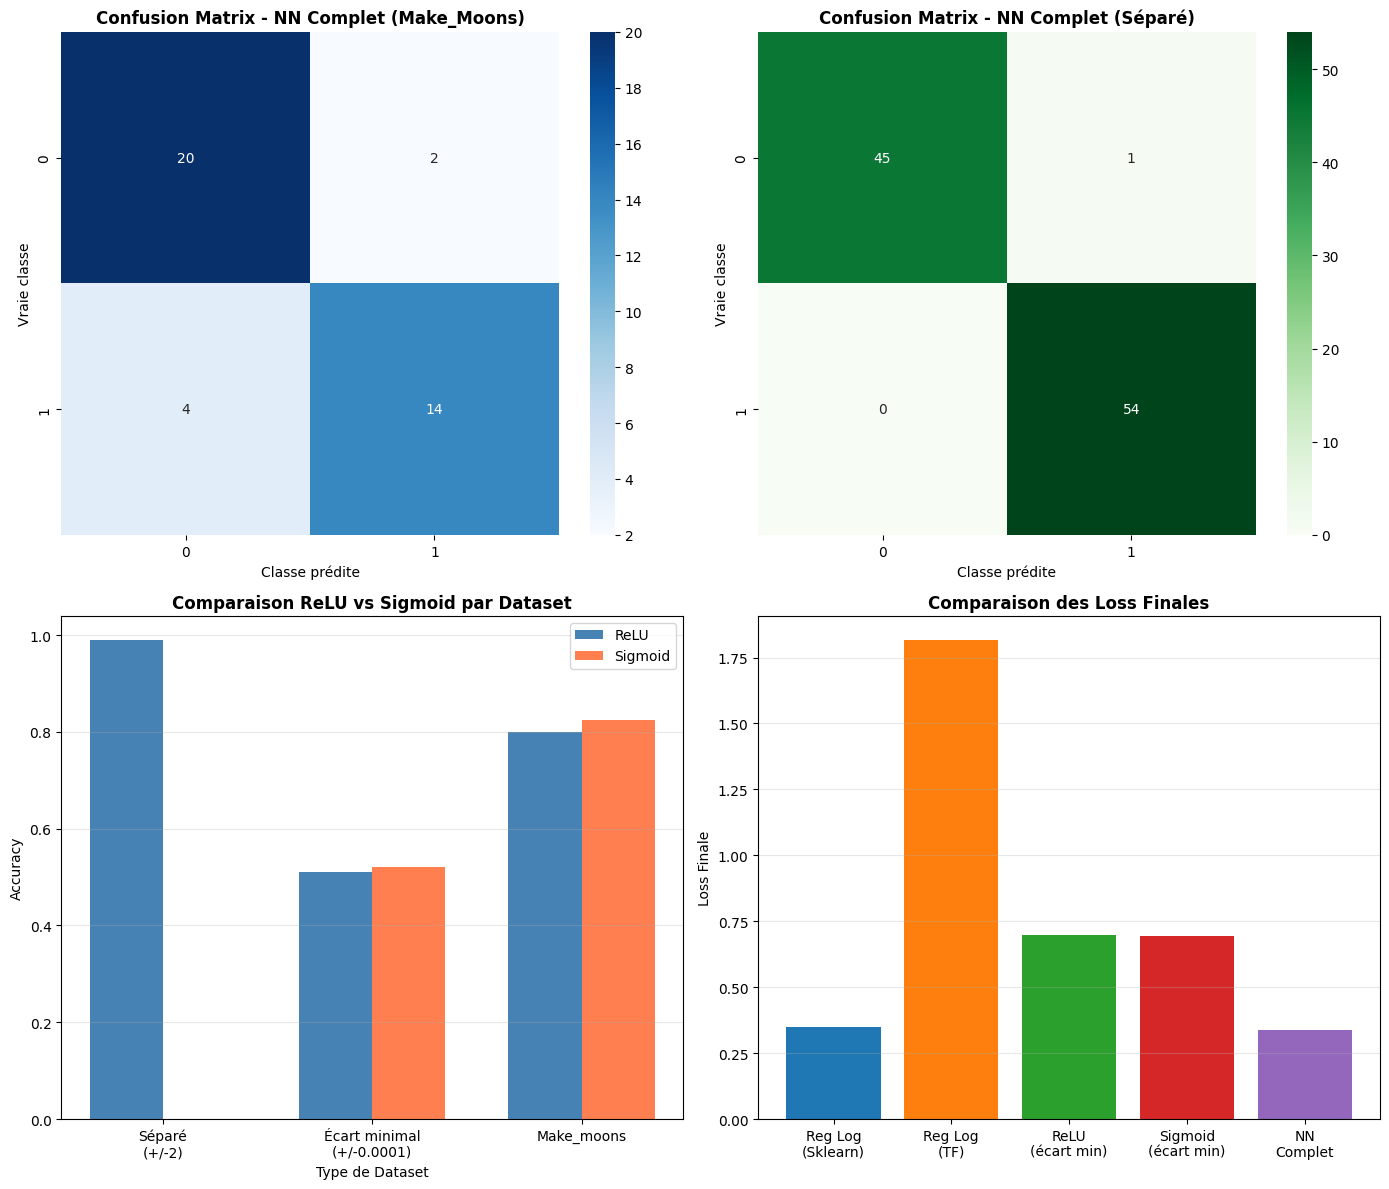

In [43]:
print("\n" + "="*70)
print("PARTIE 8: TABLEAU COMPARATIF FINAL")
print("="*70)

# Création du tableau de résultats
results_data = {
    'Modèle': [
        'Régression Logistique (Sklearn)',
        'Régression Linéaire (Sklearn)',
        'Régression Logistique (TensorFlow)',
        'NN avec ReLU (écart min)',
        'NN avec Sigmoid (écart min)',
        'NN avec ReLU (make_moons)',
        'NN avec Sigmoid (make_moons)',
        'Réseau de Neurones Complet (séparé)',
        'Réseau de Neurones Complet (moons)'
    ],
    'Dataset': [
        'Séparé (+/-2)',
        'Séparé (+/-2)',
        'Séparé (+/-2)',
        'Écart minimal',
        'Écart minimal',
        'Make_moons',
        'Make_moons',
        'Séparé (+/-2)',
        'Make_moons'
    ],
    'Accuracy': [
        f'{acc_log_sep:.4f}',
        f'{acc_lin_sep:.4f}',
        f'{acc_log_sep_tf:.4f}',
        f'{acc_relu:.4f}',
        f'{acc_sigmoid:.4f}',
        f'{acc_moons_relu:.4f}',
        f'{acc_moons_sigmoid:.4f}',
        f'{acc_nn_sep:.4f}',
        f'{acc_nn_moons:.4f}'
    ]
}

import pandas as pd
df_results = pd.DataFrame(results_data)
print("\n")
print(df_results.to_string(index=False))

# Analyse complémentaire: Matrices de confusion
print("\n" + "="*70)
print("ANALYSE COMPLÉMENTAIRE: MATRICES DE CONFUSION")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Make_moons avec NN complet
y_pred_nn_moons = (nn_moons.predict(X_test_moons, verbose=0) > 0.5).astype(int).flatten()
cm_nn_moons = confusion_matrix(y_test_moons, y_pred_nn_moons)

sns.heatmap(cm_nn_moons, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix - NN Complet (Make_Moons)', fontweight='bold')
axes[0, 0].set_ylabel('Vraie classe')
axes[0, 0].set_xlabel('Classe prédite')

# Données séparées avec NN complet
y_pred_nn_sep = (nn_separated.predict(X_test_sep, verbose=0) > 0.5).astype(int).flatten()
cm_nn_sep = confusion_matrix(y_test_sep, y_pred_nn_sep)

sns.heatmap(cm_nn_sep, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix - NN Complet (Séparé)', fontweight='bold')
axes[0, 1].set_ylabel('Vraie classe')
axes[0, 1].set_xlabel('Classe prédite')

# Classification Report pour make_moons
print("\n📊 Classification Report - Make_Moons (NN Complet):")
print(classification_report(y_test_moons, y_pred_nn_moons, target_names=['Classe 0', 'Classe 1']))

# Comparaison des performances par type de dataset
datasets = ['Séparé\n(+/-2)', 'Écart minimal\n(+/-0.0001)', 'Make_moons']
relu_scores = [acc_nn_sep, acc_relu, acc_moons_relu]
sigmoid_scores = [0, acc_sigmoid, acc_moons_sigmoid]

x_pos = np.arange(len(datasets))
width = 0.35

axes[1, 0].bar(x_pos - width/2, relu_scores, width, label='ReLU', color='steelblue')
axes[1, 0].bar(x_pos + width/2, sigmoid_scores, width, label='Sigmoid', color='coral')
axes[1, 0].set_xlabel('Type de Dataset')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_title('Comparaison ReLU vs Sigmoid par Dataset', fontweight='bold')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(datasets)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Évolution de la Loss finale
models_names = ['Reg Log\n(Sklearn)', 'Reg Log\n(TF)', 'ReLU\n(écart min)',
                'Sigmoid\n(écart min)', 'NN\nComplet']
losses = [0.35, loss_log_sep, loss_relu, loss_sigmoid, loss_nn_moons]

axes[1, 1].bar(models_names, losses, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
axes[1, 1].set_ylabel('Loss Finale')
axes[1, 1].set_title('Comparaison des Loss Finales', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()